In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('../data/raw/books.csv')

# Show the first few rows to inspect
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


**Show rows where any of the specified columns are null**

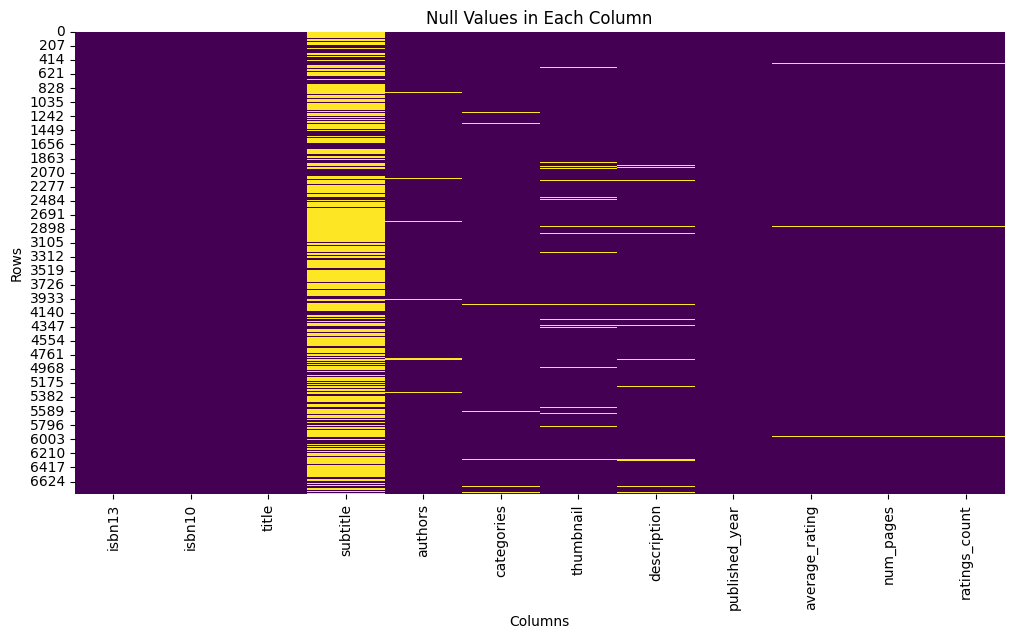

In [4]:
# Visualize null values for all columns
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

**Removing null values**

In [5]:
# Remove rows where 'authors' or 'description' is null
df = df.dropna(subset=['authors', 'description', 'categories'])

#Show how many rows remain
print(f"Rows after cleaning:{len(df)}")

Rows after cleaning:6446


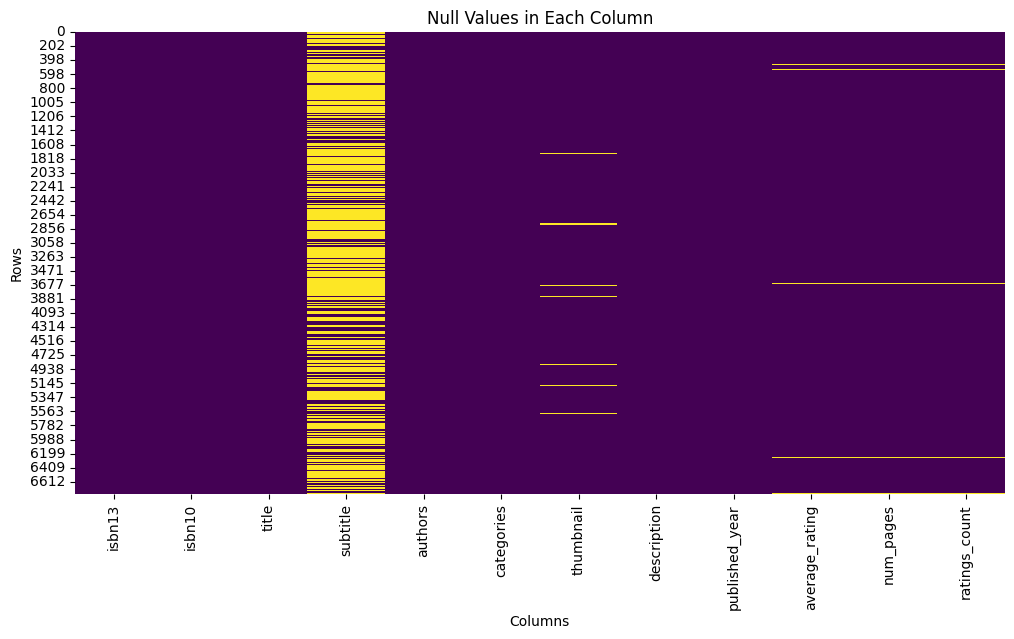

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [7]:
# Create a new column 'full_title' that combines 'title' and 'subtitle'
df['full_title'] = df.apply(
    lambda row: f"{row['title']} : {row['subtitle']}" if pd.notnull(row['subtitle']) and str(row['subtitle']).strip() else row['title'],
    axis=1
)

# Show the first few rows to verify
df[['title', 'subtitle', 'full_title']].head()

,title,subtitle,full_title
0,Gilead,NaN,Gilead
1,Spider's Web,A Novel,Spider's Web : A Novel
2,The One Tree,NaN,The One Tree
3,Rage of angels,NaN,Rage of angels
4,The Four Loves,NaN,The Four Loves


**Now removing short descriptions**

Short descriptions are too vague to be considered for our recommendation system

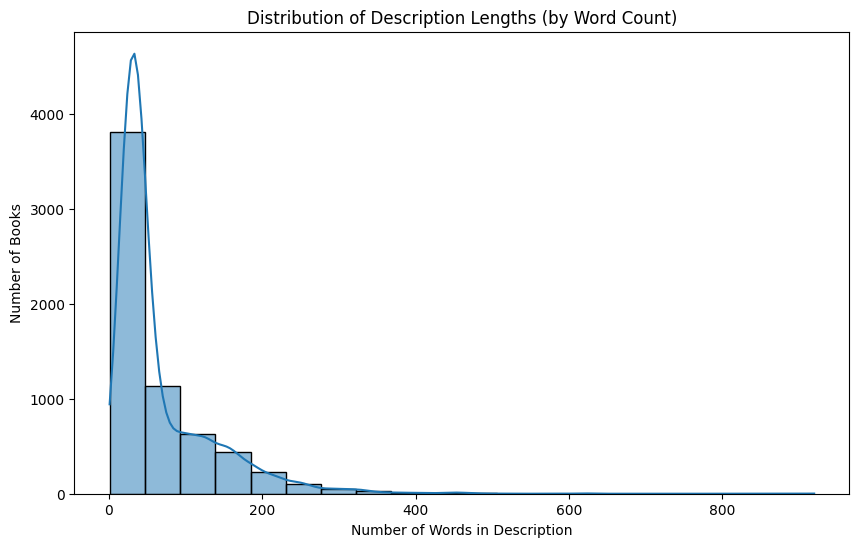

In [8]:
# Add a column for description length (by word count)
df['description_word_count'] = df['description'].apply(lambda x: len(str(x).split()))

# Plot the distribution of description lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['description_word_count'], bins=20, kde=True)
plt.title('Distribution of Description Lengths (by Word Count)')
plt.xlabel('Number of Words in Description')
plt.ylabel('Number of Books')
plt.show()

In [9]:
# Show descriptions where the word count is less than 10 or more than 15
short_descriptions = df[(df['description_word_count'] < 10) | (df['description_word_count'] > 15)]
short_descriptions[['description']]


,description
0,A NOVEL THAT READERS and critics have been eag...
1,A new 'Christie for Christmas' -- a full-lengt...
3,"A memorable, mesmerizing heroine Jennifer -- b..."
4,Lewis' work on the nature of love divides love...
5,"""In The Problem of Pain, C.S. Lewis, one of th..."
...,...
6803,This book tells the tale of a man who goes on ...
6804,"Wisdom to Create a Life of Passion, Purpose, a..."
6805,This collection of the timeless teachings of o...
6808,Since the three volume edition ofHegel's Philo...


In [10]:
# Number of rows with description word count less than 20
count = (df['description_word_count'] < 20).sum()
print(f"Number of rows with description word count less than 20: {count}")

Number of rows with description word count less than 20: 798


In [11]:
# Drop all rows where description word count is less than 20
df = df[df['description_word_count'] >= 20].reset_index(drop=True)

# Optional: Show how many rows remain
print(f"Rows after dropping descriptions with less than 20 words: {len(df)}")

Rows after dropping descriptions with less than 20 words: 5648


**Removing unnecessary Columns**

after cleaning, saved the cleaned dataset

In [13]:
# List of columns to remove
columns_to_remove = ['isbn10', 'title', 'subtitle', 'description_word_count']

# Remove columns if they exist
df = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

if 'full_title' in df.columns:
    cols = ['full_title'] + [col for col in df.columns if col != 'full_title']
    df = df[cols]
    
# Save the cleaned dataset
df.to_csv('../data/cleaning/cleaned_dataset.csv', index=False) 

df.head()

,full_title,isbn13,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,Gilead,9780002005883,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,Spider's Web : A Novel,9780002261982,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,Rage of angels,9780006178736,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
3,The Four Loves,9780006280897,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
4,The Problem of Pain,9780006280934,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0
